# Assignment 9: GBDT

#### Response Coding: Example

<img src='http://i.imgur.com/TufZptV.jpg' width=700px>

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.05]

<ol>
    <li><strong>Apply GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)+sentiment Score of eassay(check the bellow example, include all 4 values as 4 features)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation/simple cross validation data</li>
    <li>use gridsearch cv or randomsearch cv or you can write your own for loops to do this task</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
            </ul>
    <br>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

In [1]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

<h1>1. GBDT (xgboost/lightgbm) </h1>

## 1.1 Loading Data

In [2]:
#please use below code to load glove vectors 
import pickle
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [3]:
import pandas as pd
import numpy as np
data = pd.read_csv('data.csv')
data = data.drop('project_title',axis=1)
data.dropna(inplace=True)
data.head(1)

,teacher_prefix,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,teacher_number_of_previously_posted_projects,project_is_approved,essay,title,price
0,mrs,in,grades_prek_2,literacy_language,esl_literacy,0,0,students english learners working english seco...,educational support english learners home,154.6


<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [4]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'],axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [6]:
y_train[15]

1

<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

## Encoding using TFIDF Vectorizer

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm
print('Train and test shapes:')
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print("="*100)

#Encoding project essay
vectorizer1 = TfidfVectorizer(min_df=10)
tqdm(vectorizer1.fit(X_train['essay'].values))
train_tfidf_essay = vectorizer1.transform(X_train['essay'].values)
test_tfidf_essay = vectorizer1.transform(X_test['essay'].values)

print("After vectorization of essay")
print(train_tfidf_essay.shape, y_train.shape)
print(test_tfidf_essay.shape,y_test.shape)


#Encoding project_title
from sklearn.feature_extraction.text import TfidfVectorizer

print("="*100)


vectorizer2 = TfidfVectorizer(min_df=10)
tqdm(vectorizer2.fit(X_train['title'].values))
train_tfidf_title = vectorizer2.transform(X_train['title'].values)
test_tfidf_title = vectorizer2.transform(X_test['title'].values)

print("After vectorization of title")
print(train_tfidf_title.shape, y_train.shape)
print(test_tfidf_title.shape,y_test.shape)

Train and test shapes:
(73167, 9) (73167,)
(36038, 9) (36038,)


0it [00:00, ?it/s]


After vectorization of essay
(73167, 14071) (73167,)
(36038, 14071) (36038,)


0it [00:00, ?it/s]


After vectorization of title
(73167, 2518) (73167,)
(36038, 2518) (36038,)


## Encoding using TFIDF W2V Vectorizer

In [6]:
# we are converting a dictionary with word as a key, and the idf as a value
dictionary1 = dict(zip(vectorizer1.get_feature_names(), list(vectorizer1.idf_)))
tfidf_words1 = set(vectorizer1.get_feature_names())
# we are converting a dictionary with word as a key, and the idf as a value
dictionary2 = dict(zip(vectorizer2.get_feature_names(), list(vectorizer2.idf_)))
tfidf_words2 = set(vectorizer2.get_feature_names())

In [7]:
#Encoding train_essay
tfidf_w2v_essay_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words1):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary1[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_essay_vectors.append(vector)

100%|███████████████████████████████████████████████████████████████████████████| 73167/73167 [02:47<00:00, 437.84it/s]


In [8]:
len(tfidf_w2v_essay_vectors)

73167

In [9]:
#Encoding test_essay
tfidf_test_w2v_essay_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words1):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary1[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_test_w2v_essay_vectors.append(vector)

100%|███████████████████████████████████████████████████████████████████████████| 36038/36038 [01:17<00:00, 464.63it/s]


In [10]:
len(tfidf_test_w2v_essay_vectors)

36038

In [11]:
#Encoding train_title
tfidf_w2v_title_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words2):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary2[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_title_vectors.append(vector)

100%|█████████████████████████████████████████████████████████████████████████| 73167/73167 [00:02<00:00, 35102.80it/s]


In [12]:
#Encoding test_title
tfidf_test_w2v_title_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words2):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary2[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_test_w2v_title_vectors.append(vector)

100%|█████████████████████████████████████████████████████████████████████████| 36038/36038 [00:01<00:00, 24279.39it/s]


In [13]:
len(tfidf_test_w2v_title_vectors)

36038

# Sentiment scores on essay 

In [14]:
from tqdm import tqdm
essays_train=X_train['essay'].values
essays_test=X_test['essay'].values
scores_train=[]
scores_test=[]
for essay in tqdm(essays_train):
    scores_train.append(sid.polarity_scores(essay))
for essay in tqdm(essays_test):
    scores_test.append(sid.polarity_scores(essay))

100%|███████████████████████████████████████████████████████████████████████████| 36038/36038 [01:16<00:00, 469.99it/s]


In [15]:
scores_train[0:2]
import numpy as np
neg_train=[]
neu_train=[]
pos_train=[]
comp_train=[]
neg_test=[]
neu_test=[]
pos_test=[]
comp_test=[]
scores_train[0:2]

[{'neg': 0.03, 'neu': 0.702, 'pos': 0.268, 'compound': 0.9753},
 {'neg': 0.108, 'neu': 0.739, 'pos': 0.153, 'compound': 0.6774}]

In [16]:
for i in tqdm(range(len(scores_train))):
    neg_train.append(scores_train[i]['neg'])
    neu_train.append(scores_train[i]['neu'])
    pos_train.append(scores_train[i]['pos'])
    comp_train.append(scores_train[i]['compound'])
for i in tqdm(range(len(scores_test))):
    neg_test.append(scores_test[i]['neg'])
    neu_test.append(scores_test[i]['neu'])
    pos_test.append(scores_test[i]['pos'])
    comp_test.append(scores_test[i]['compound'])

100%|████████████████████████████████████████████████████████████████████████| 36038/36038 [00:00<00:00, 842545.39it/s]


In [17]:
import pandas as pd
neg_train=np.array(neg_train)
neu_train=np.array(neu_train)
pos_train=np.array(pos_train)
comp_train=np.array(comp_train)
neg_test=np.array(neg_test)
neu_test=np.array(neu_test)
pos_test=np.array(pos_test)
comp_test=np.array(comp_test)

In [18]:
ss_train=pd.DataFrame({'neg':neg_train,'neu':neu_train,'pos':pos_train,'compound':comp_train},columns=['neg','neu','pos','compound'])

In [19]:
ss_test=pd.DataFrame({'neg':neg_test,'neu':neu_test,'pos':pos_test,'compound':comp_test},columns=['neg','neu','pos','compound'])

In [20]:
ss_test.head()

,neg,neu,pos,compound
0,0.131,0.643,0.225,0.8856
1,0.030,0.640,0.329,0.9925
2,0.000,0.813,0.187,0.9867
3,0.039,0.601,0.360,0.9967
4,0.118,0.637,0.245,0.9633


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

## Encoding categorical: teacher_prefix

In [21]:
# Concatenating 'teacher_prefix' and target variables into a dataframe
df = pd.concat([X_train['teacher_prefix'],pd.Series(y_train,name='y_hat',index=X_train['teacher_prefix'].index)],join='inner',axis=1)
na = np.array(df) 
response_table = dict() # A dict to store a list of prob_scores for unique categories
for i in range(len(na)):
    if not na[i][0] in response_table.keys():
        response_table[na[i][0]]=[0,0]
        response_table[na[i][0]][na[i][1]]+=1
    else :
        response_table[na[i][0]][na[i][1]]+=1 
#Dividing each value in dict by the count of each unique category to get the prob_value
for key,value in response_table.items():
    response_table[key]/=np.sum(np.array(value))

#Modified list to hold prob_scores in the form [P[Y=0/category],P[Y=1/category]]
modified = []
for pair in na:
    key = pair[0]
    modified.append(response_table[key])
prefix_encoded = pd.DataFrame(data=modified,columns=['teacher_prefix_0','teacher_prefix_1'],index=X_train['teacher_prefix'].index)


In [22]:
prefix_test = X_test['teacher_prefix'].values
prefix_test_encoded = []
for i in range(len(prefix_test)):
    key = prefix_test[i]
    if key in response_table.keys():
        prefix_test_encoded.append(response_table[key])
    else:
        prefix_test_encoded.append([0.5,0.5])
prefix_test_encoded = pd.DataFrame(data=prefix_test_encoded,columns=['teacher_prefix_0','teacher_prefix_1'],index=X_test['teacher_prefix'].index)
        

## Encoding categorical: school_state

In [23]:
#Encoding school state
df = pd.concat([X_train['school_state'],pd.Series(y_train,name='y_hat',index=X_train['school_state'].index)],join='inner',axis=1)
na = np.array(df)
response_table = dict()
for i in range(len(na)):
    if not na[i][0] in response_table.keys():
        response_table[na[i][0]]=[0,0]
        response_table[na[i][0]][na[i][1]]+=1
    else :
        response_table[na[i][0]][na[i][1]]+=1 


for key,value in response_table.items():
    response_table[key]/=np.sum(np.array(value))
modified = []
for pair in na:
    key = pair[0]
    modified.append(response_table[key])
state_encoded = pd.DataFrame(data=modified,columns=['school_state_0','school_state_1'],index=X_train['school_state'].index)


In [24]:
state_test = X_test['school_state'].values
state_test_encoded = []
for i in range(len(state_test)):
    key = state_test[i]
    if key in response_table.keys():
        state_test_encoded.append(response_table[key])
    else:
        state_test_encoded.append([0.5,0.5])
state_test_encoded = pd.DataFrame(data=state_test_encoded,columns=['school_state_0','school_state_1'],index=X_test['school_state'].index)

## Encoding categorical: project_grade

In [25]:
#Encoding project_grade category
df = pd.concat([X_train['project_grade_category'],pd.Series(y_train,name='y_hat',index=X_train['project_grade_category'].index)],join='inner',axis=1)
na = np.array(df)
response_table = dict()
for i in range(len(na)):
    if not na[i][0] in response_table.keys():
        response_table[na[i][0]]=[0,0]
        response_table[na[i][0]][na[i][1]]+=1
    else :
        response_table[na[i][0]][na[i][1]]+=1 


for key,value in response_table.items():
    response_table[key]/=np.sum(np.array(value))
modified = []
for pair in na:
    key = pair[0]
    modified.append(response_table[key])
grade_encoded = pd.DataFrame(data=modified,columns=['project_grade_category_0','project_grade_category_1'],index=X_train['project_grade_category'].index)

In [26]:
response_table

{'grades_3_5': array([0.14415396, 0.85584604]),
 'grades_prek_2': array([0.15006047, 0.84993953]),
 'grades_9_12': array([0.16072657, 0.83927343]),
 'grades_6_8': array([0.16093778, 0.83906222])}

In [27]:
grade_test = X_test['project_grade_category'].values
grade_test_encoded = []
for i in range(len(grade_test)):
    key = grade_test[i]
    if key in response_table.keys():
        grade_test_encoded.append(response_table[key])
    else:
        grade_test_encoded.append([0.5,0.5])
grade_test_encoded = pd.DataFrame(data=grade_test_encoded,columns=['project_grade_category_0','project_grade_category_1'],index=X_test['project_grade_category'].index)

## Encoding categorical: clean_categories

In [28]:
#Encoding categories
df = pd.concat([X_train['project_subject_categories'],pd.Series(y_train,name='y_hat',index=X_train['project_subject_categories'].index)],join='inner',axis=1)
na = np.array(df)
response_table = dict()
for i in range(len(na)):
    if not na[i][0] in response_table.keys():
        response_table[na[i][0]]=[0,0]
        response_table[na[i][0]][na[i][1]]+=1
    else :
        response_table[na[i][0]][na[i][1]]+=1 


for key,value in response_table.items():
    response_table[key]/=np.sum(np.array(value))
modified = []
for pair in na:
    key = pair[0]
    modified.append(response_table[key])
cat_encoded = pd.DataFrame(data=modified,columns=['clean_categories_0','clean_categories_1'],index=X_train['project_subject_categories'].index)

In [29]:
cat_test = X_test['project_subject_categories'].values
cat_test_encoded = []
for i in range(len(cat_test)):
    key = cat_test[i]
    if key in response_table.keys():
        cat_test_encoded.append(response_table[key])
    else:
        cat_test_encoded.append([0.5,0.5])
cat_test_encoded = pd.DataFrame(data=cat_test_encoded,columns=['clean_categories_0','clean_categories_1'],index=X_test['project_subject_categories'].index)


## Encoding categorical: clean_subcategories

In [30]:
#Encoding sub_categories

df = pd.concat([X_train['project_subject_subcategories'],pd.Series(y_train,name='y_hat',index=X_train['project_subject_subcategories'].index)],join='inner',axis=1)
na = np.array(df)
response_table = dict()
for i in range(len(na)):
    if not na[i][0] in response_table.keys():
        response_table[na[i][0]]=[0,0]
        response_table[na[i][0]][na[i][1]]+=1
    else :
        response_table[na[i][0]][na[i][1]]+=1 


for key,value in response_table.items():
    response_table[key]/=np.sum(np.array(value))
modified = []
for pair in na:
    key = pair[0]
    modified.append(response_table[key])
sub_cat_encoded = pd.DataFrame(data=modified,columns=['clean_subcategories_0','clean_subcategories_1'],index=X_train['project_subject_subcategories'].index)

In [31]:
sub_cat_test = X_test['project_subject_subcategories'].values
sub_cat_test_encoded = []
for i in range(len(sub_cat_test)):
    key = sub_cat_test[i]
    if key in response_table.keys():
        sub_cat_test_encoded.append(response_table[key])
    else:
        sub_cat_test_encoded.append([0.5,0.5])
sub_cat_test_encoded = pd.DataFrame(data=sub_cat_test_encoded,columns=['clean_subcategories_0','clean_subcategories_1'],index=X_test['project_subject_subcategories'].index)


## Encoding numerical:price,previous_projects and sentiment scores

In [32]:
#Encoding numercial features- price
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['price'].values.reshape(1,-1))

x_train_price_std = normalizer.transform(X_train['price'].values.reshape(1,-1))
x_test_price_std = normalizer.transform(X_test['price'].values.reshape(1,-1))

x_train_price_std = x_train_price_std.reshape(-1,1)
x_test_price_std = x_test_price_std.reshape(-1,1)

print('After vectorization:...')
print(x_train_price_std.shape,y_train.shape)
print(x_test_price_std.shape,y_test.shape)
#feature_list.append('price')
#feature_list2.append('price')
print("="*100)
#print(x_train_price_std)

After vectorization:...
(73167, 1) (73167,)
(36038, 1) (36038,)


In [33]:
#Encoding  teacher_number_of_previously_posted_projects
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

x_train_nppp_std = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
x_test_nppp_std = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

x_train_nppp_std = x_train_nppp_std.reshape(-1,1)
x_test_nppp_std = x_test_nppp_std.reshape(-1,1)

print('After vectorization:...')
print(x_train_nppp_std.shape,y_train.shape)
print(x_test_nppp_std.shape,y_test.shape)
#feature_list.append('teacher_number_of_previously_posted_projects')
#feature_list2.append('teacher_number_of_previously_posted_projects')
print("="*100)

After vectorization:...
(73167, 1) (73167,)
(36038, 1) (36038,)


In [34]:
#Encoding  sentiment scores ['neg']
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(ss_train['neg'].values.reshape(1,-1))

x_train_neg_std = normalizer.transform(ss_train['neg'].values.reshape(1,-1))
x_test_neg_std = normalizer.transform(ss_test['neg'].values.reshape(1,-1))

x_train_neg_std = x_train_neg_std.reshape(-1,1)
x_test_neg_std = x_test_neg_std.reshape(-1,1)

print('After vectorization:...')
print(x_train_neg_std.shape,y_train.shape)
print(x_test_neg_std.shape,y_test.shape)
#feature_list.append('teacher_number_of_previously_posted_projects')
#feature_list2.append('teacher_number_of_previously_posted_projects')
print("="*100)

After vectorization:...
(73167, 1) (73167,)
(36038, 1) (36038,)


In [35]:
#Encoding  sentiment scores ['neu']
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(ss_train['neu'].values.reshape(1,-1))

x_train_neu_std = normalizer.transform(ss_train['neu'].values.reshape(1,-1))
x_test_neu_std = normalizer.transform(ss_test['neu'].values.reshape(1,-1))

x_train_neu_std = x_train_neu_std.reshape(-1,1)
x_test_neu_std = x_test_neu_std.reshape(-1,1)

print('After vectorization:...')
print(x_train_neu_std.shape,y_train.shape)
print(x_test_neu_std.shape,y_test.shape)
#feature_list.append('teacher_number_of_previously_posted_projects')
#feature_list2.append('teacher_number_of_previously_posted_projects')
print("="*100)

After vectorization:...
(73167, 1) (73167,)
(36038, 1) (36038,)


In [36]:
#Encoding  sentiment scores ['pos']
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(ss_train['pos'].values.reshape(1,-1))

x_train_pos_std = normalizer.transform(ss_train['pos'].values.reshape(1,-1))
x_test_pos_std = normalizer.transform(ss_test['pos'].values.reshape(1,-1))

x_train_pos_std = x_train_pos_std.reshape(-1,1)
x_test_pos_std = x_test_pos_std.reshape(-1,1)

print('After vectorization:...')
print(x_train_pos_std.shape,y_train.shape)
print(x_test_pos_std.shape,y_test.shape)
#feature_list.append('teacher_number_of_previously_posted_projects')
#feature_list2.append('teacher_number_of_previously_posted_projects')
print("="*100)

After vectorization:...
(73167, 1) (73167,)
(36038, 1) (36038,)


In [37]:
#Encoding  sentiment scores ['compound']

from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(ss_train['compound'].values.reshape(1,-1))

x_train_comp_std = normalizer.transform(ss_train['compound'].values.reshape(1,-1))
x_test_comp_std = normalizer.transform(ss_test['compound'].values.reshape(1,-1))

x_train_comp_std = x_train_comp_std.reshape(-1,1)
x_test_comp_std = x_test_comp_std.reshape(-1,1)

print('After vectorization:...')
print(x_train_comp_std.shape,y_train.shape)
print(x_test_comp_std.shape,y_test.shape)
#feature_list.append('teacher_number_of_previously_posted_projects')
#feature_list2.append('teacher_number_of_previously_posted_projects')
print("="*100)

After vectorization:...
(73167, 1) (73167,)
(36038, 1) (36038,)


In [38]:
#Concating all features..
from scipy.sparse import hstack
#Set 1: (response-encoded)categorical+numerical features + preprocessed_essay (TFIDF) +preprocessed_essay (TFIDF) + sentiment_scores
X_tr1 = hstack((train_tfidf_essay,train_tfidf_title,state_encoded,prefix_encoded,grade_encoded,cat_encoded,sub_cat_encoded,x_train_price_std,x_train_nppp_std,x_train_neg_std,x_train_neu_std,x_train_pos_std,x_train_comp_std)).tocsr()
X_te1 = hstack((test_tfidf_essay,test_tfidf_title,state_test_encoded,prefix_test_encoded,grade_test_encoded,cat_test_encoded,sub_cat_test_encoded,x_test_price_std,x_test_nppp_std,x_test_neg_std,x_test_neu_std,x_test_pos_std,x_test_comp_std)).tocsr()

print("Set 1:")
print(X_tr1.shape, y_train.shape)
print(X_te1.shape, y_test.shape)


Set 1:
(73167, 16605) (73167,)
(36038, 16605) (36038,)


In [39]:

#Set 2: (response-encoded)categorical+numerical features + preprocessed_essay (TFIDFW2v) +preprocessed_essay (TFIDFW2V) 

X_tr2 = hstack((tfidf_w2v_essay_vectors,tfidf_w2v_title_vectors,state_encoded,prefix_encoded,grade_encoded,cat_encoded,sub_cat_encoded,x_train_price_std,x_train_nppp_std)).tocsr()
X_te2 = hstack((tfidf_test_w2v_essay_vectors,tfidf_test_w2v_title_vectors,state_test_encoded,prefix_test_encoded,grade_test_encoded,cat_test_encoded,sub_cat_test_encoded,x_test_price_std,x_test_nppp_std)).tocsr()

print('Set 2 ')
print(X_tr2.shape, y_train.shape)
print(X_te2.shape, y_test.shape)

Set 2 
(73167, 612) (73167,)
(36038, 612) (36038,)


<h2>1.5 Appling Models on different kind of featurization as mentioned in the instructions</h2>

# Hyperparameter Tuning (n_estimators & max_depth)

<br>Apply GBDT on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [40]:
import warnings
warnings.filterwarnings("ignore")

In [41]:
import xgboost as xgb

In [42]:
# Reference https://machinelearningmastery.com/xgboost-for-imbalanced-classification/
#To balance the class weight, sample_pos_weight = #-ve pts/#+ve pts
from collections import Counter 
counter = Counter(y_train)
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)

Estimate: 0.178


In [43]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
#Hyperparameter tuning for feature set1
params ={'max_depth':[1, 5, 10, 50],'n_estimators':[1, 10, 50, 100]}
model = xgb.XGBClassifier(scale_pos_weight=estimate,verbose=1) # Class-weight parameter
clf = RandomizedSearchCV(model,params,cv=5,scoring='roc_auc',return_train_score=True,n_jobs=-1,verbose=3)
result=clf.fit(X_tr1,y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 95.3min finished


[00:52:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [46]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
#Hyperparameter tuning for feature set1
params ={'max_depth':[1, 5, 10, 50],'n_estimators':[1, 10, 50, 100]}
model = xgb.XGBClassifier(scale_pos_weight=estimate,verbose=1)
clf = RandomizedSearchCV(model,params,cv=5,scoring='roc_auc',return_train_score=True,n_jobs=-1,verbose=3)
result2=clf.fit(X_tr2,y_train)

results2 = pd.DataFrame.from_dict(clf.cv_results_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 168.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 316.7min finished


[09:02:07] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




# Representation of results: Feature Set 1

Text(0.5,1,'Corelation Heatmap of Train')

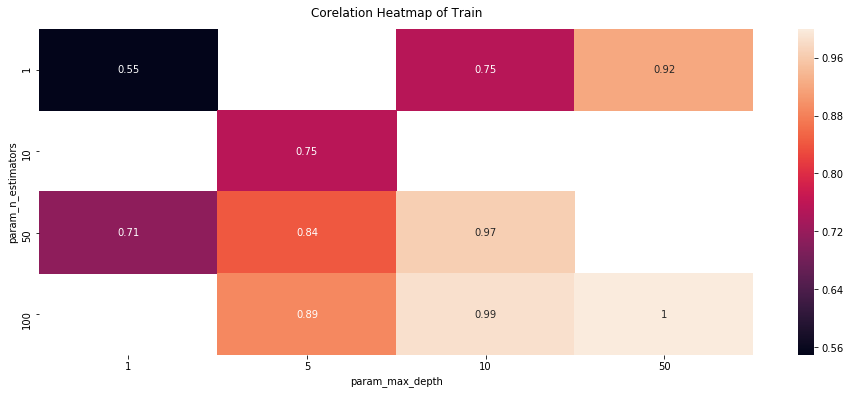

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
HeatTrain = results.copy()
HeatTrain = HeatTrain.pivot_table(index='param_n_estimators',columns='param_max_depth',values='mean_train_score')
plt.figure(figsize=(16,6))
hmap = sns.heatmap(HeatTrain,annot=True)
hmap.set_title('Corelation Heatmap of Train', fontdict={'fontsize':12},pad=12)

Text(0.5,1,'Corelation Heatmap of Cross-Validation')

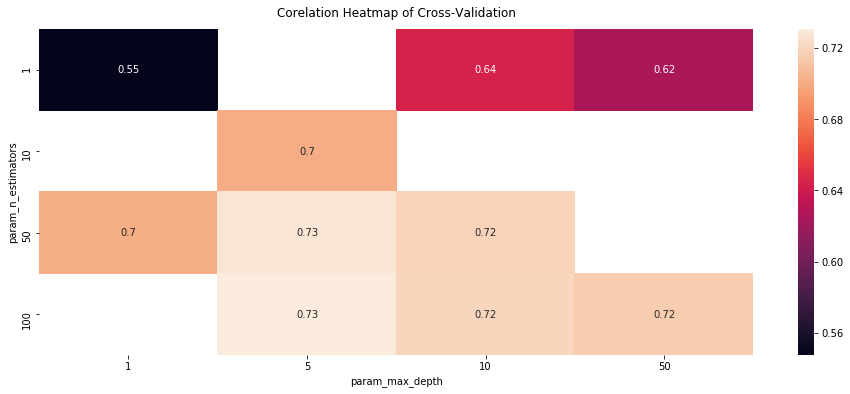

In [52]:
HeatTest = results.copy()
HeatTest = HeatTest.pivot_table(index='param_n_estimators',columns='param_max_depth',values='mean_test_score')
plt.figure(figsize=(16,6))
hmap = sns.heatmap(HeatTest,annot=True)
hmap.set_title('Corelation Heatmap of Cross-Validation', fontdict={'fontsize':12},pad=12)

In [53]:

def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [54]:
result.best_params_

{'n_estimators': 100, 'max_depth': 5}

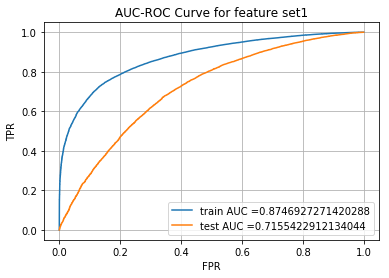

In [55]:
best_n_estimators = 100
best_max_depth = 5
#After finding the best hyperparameter, we use that alpha to train the model and test its performacnce using test AUC score

from sklearn.metrics import roc_curve, auc
model = xgb.XGBClassifier(max_depth=best_max_depth,n_estimators=best_n_estimators,scale_pos_weight=estimate)
model.fit(X_tr1,y_train)

y_train_pred = batch_predict(model,X_tr1)
y_test_pred = batch_predict(model,X_te1)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred) #roc_curve(true class labels,probs of class 1)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC-ROC Curve for feature set1")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.6343895136909512 for threshold 0.514
Test confusion matrix


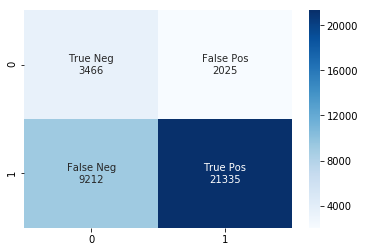

In [56]:
#Printing the confusion matrix with heatmap enabled -row = actual and column = predicted samples
# 0=negative and 1=positive
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Test confusion matrix")
cm = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))


import seaborn as sns
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]

group_names = ['True Neg','False Pos','False Neg','True Pos']
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels,fmt="",cmap='Blues');

# Representation of results (Feature Set 2)

Text(0.5,1,'Corelation Heatmap of Train')

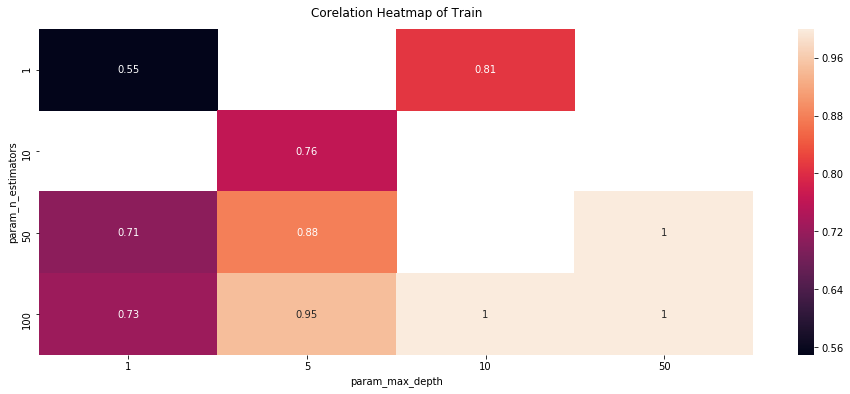

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
HeatTrain = results2.copy()
HeatTrain = HeatTrain.pivot_table(index='param_n_estimators',columns='param_max_depth',values='mean_train_score')
plt.figure(figsize=(16,6))
hmap = sns.heatmap(HeatTrain,annot=True)
hmap.set_title('Corelation Heatmap of Train', fontdict={'fontsize':12},pad=12)

Text(0.5,1,'Corelation Heatmap of Cross-Validation')

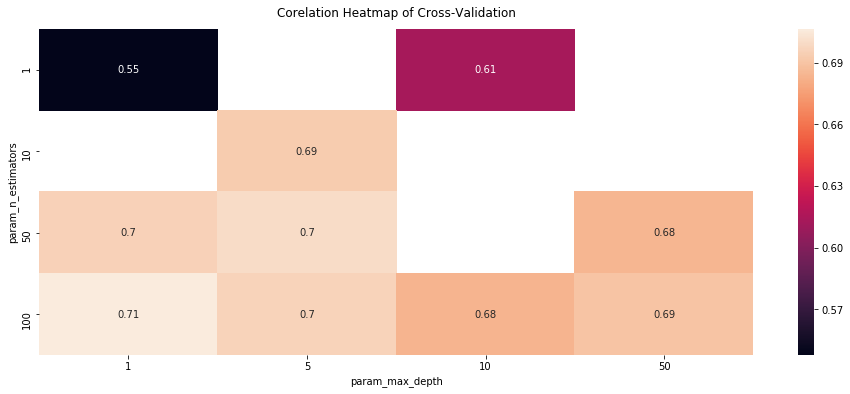

In [58]:
HeatTest = results2.copy()
HeatTest = HeatTest.pivot_table(index='param_n_estimators',columns='param_max_depth',values='mean_test_score')
plt.figure(figsize=(16,6))
hmap = sns.heatmap(HeatTest,annot=True)
hmap.set_title('Corelation Heatmap of Cross-Validation', fontdict={'fontsize':12},pad=12)

In [59]:
result2.best_params_

{'n_estimators': 100, 'max_depth': 1}

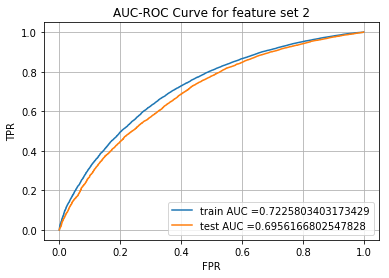

In [64]:
best_n_estimators = 100
best_max_depth = 1
#After finding the best hyperparameters, we use them to train the model and test its performacnce using test AUC score

from sklearn.metrics import roc_curve, auc
model = xgb.XGBClassifier(max_depth=best_max_depth,n_estimators=best_n_estimators,scale_pos_weight=estimate)
model.fit(X_tr2,y_train)

y_train_pred = batch_predict(model,X_tr2)
y_test_pred = batch_predict(model,X_te2)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred) #roc_curve(true class labels,probs of class 1)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC-ROC Curve for feature set 2")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.443679876598628 for threshold 0.493
Test confusion matrix


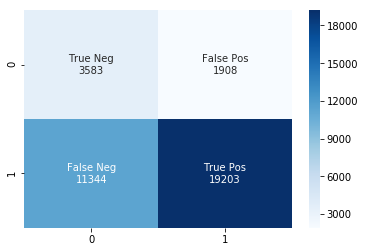

In [62]:
#Printing the confusion matrix with heatmap enabled -row = actual and column = predicted samples
# 0=negative and 1=positive
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Test confusion matrix")
cm = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))


import seaborn as sns
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]

group_names = ['True Neg','False Pos','False Neg','True Pos']
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels,fmt="",cmap='Blues');

<h1>3. Summary</h1>

<br> as mentioned in the step 4 of instructions

In [63]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Vectorizer", "Model", "Hyper parameter Max_Depth","Hyper parameter n_estimators", "AUC"]
x.add_row(["TFIDF + Sentiment Scores","XGB Classifier","5",'100',"71.15"])
x.add_row(['TFIDF W2V','XGB Classifier',"1","100","69.56"])
print('Summary of Task:')
print(x)

Summary of Task:
+--------------------------+----------------+---------------------------+------------------------------+-------+
|        Vectorizer        |     Model      | Hyper parameter Max_Depth | Hyper parameter n_estimators |  AUC  |
+--------------------------+----------------+---------------------------+------------------------------+-------+
| TFIDF + Sentiment Scores | XGB Classifier |             5             |             100              | 71.15 |
|        TFIDF W2V         | XGB Classifier |             1             |             100              | 69.56 |
+--------------------------+----------------+---------------------------+------------------------------+-------+
